In [92]:
import pandas as pd
news_df = pd.read_csv('/content/popularity.csv')
news_df.columns = news_df.columns.str.strip()
news_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [93]:
news_df['shares'].quantile([.05, .70, .78, .80, .95, 1])

0.05       584.0
0.70      2300.0
0.78      3100.0
0.80      3400.0
0.95     10800.0
1.00    843300.0
Name: shares, dtype: float64

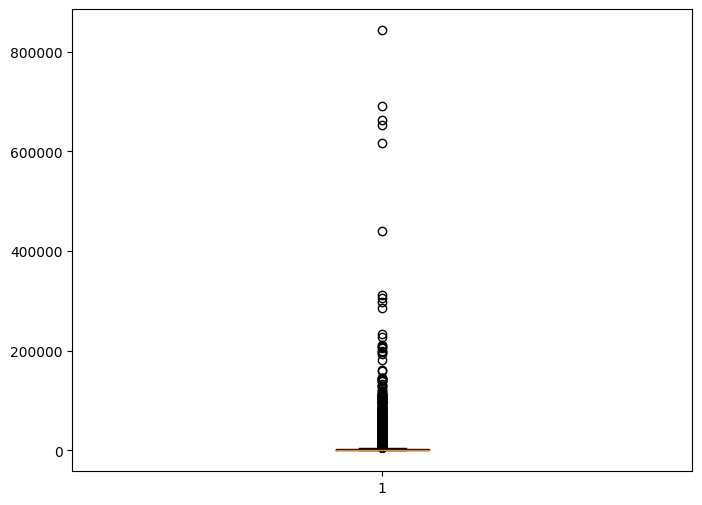

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(news_df['shares'])
plt.show()

In [104]:
P = news_df['shares'].quantile([.05, .95])

# Both sided outliers removed
news_df_1 = news_df[(news_df['shares'] >= P.iloc[0]) & (news_df['shares'] <= P.iloc[1])]

# Outliers greter than 95% removed
news_df_2 = news_df[(news_df['shares'] <= P.iloc[1])]

news_df_2.describe()


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,...,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000
mean,354.205427,10.394658,547.993601,0.549110,0.998858,0.690760,10.747259,3.301967,4.437405,1.214216,...,0.095078,0.755888,-0.258338,-0.520399,-0.107103,0.279444,0.070141,0.341902,0.153909,2074.334387
std,214.867086,2.112319,467.255173,3.611926,5.366809,3.349307,11.127499,3.855264,8.203935,4.011003,...,0.070550,0.246801,0.126841,0.289643,0.094539,0.322447,0.262575,0.188975,0.224003,1871.814139
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,163.000000,9.000000,248.000000,0.470776,1.000000,0.626263,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.326389,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,927.000000
50%,338.000000,10.000000,413.000000,0.538690,1.000000,0.690583,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.251852,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,545.000000,12.000000,718.000000,0.607477,1.000000,0.754386,13.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2400.000000
max,731.000000,23.000000,7764.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,10800.000000


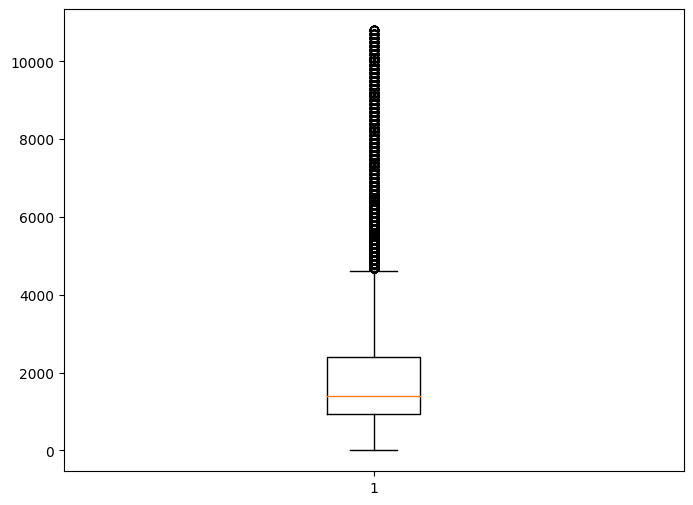

In [105]:
plt.figure(figsize=(8,6))
plt.boxplot(news_df_2['shares'])
plt.show()

In [117]:
# Removed Percentage
per = (len(news_df) - len(news_df_2))/len(news_df) *100
print(per)

4.996973060236101
